In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
Bank=pd.read_csv(r'C:\Users\ksushma\Practise\bank-additional.csv',sep=';')

In [3]:
Bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
Bank.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [5]:
Bank.shape

(41188, 21)

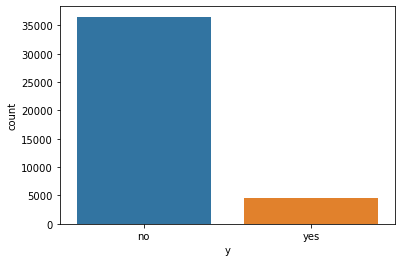

In [6]:
sns.countplot(Bank['y'])

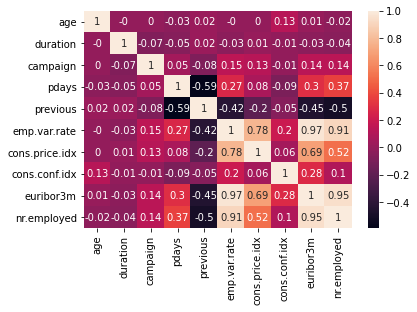

In [7]:
corr=Bank.corr().round(2)
#plt.figure(figsize=(15,10))
sns.heatmap(data=corr,annot=True)

In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [9]:

Bank['y']= le.fit_transform(Bank['y'])
Bank['job']= le.fit_transform(Bank['job'])
Bank['marital']= le.fit_transform(Bank['marital'])
Bank['education']= le.fit_transform(Bank['education'])
Bank['default']= le.fit_transform(Bank['default'])
Bank['housing']= le.fit_transform(Bank['housing'])
Bank['loan']= le.fit_transform(Bank['loan'])
Bank['contact']= le.fit_transform(Bank['contact'])
Bank['month']= le.fit_transform(Bank['month'])
Bank['day_of_week']= le.fit_transform(Bank['day_of_week'])
Bank['poutcome']= le.fit_transform(Bank['poutcome'])



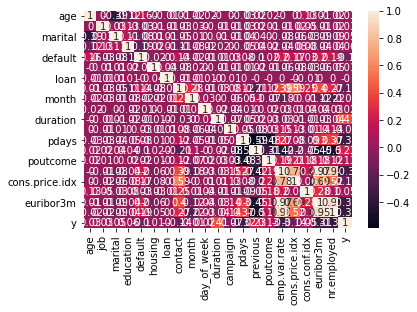

In [10]:
corr=Bank.corr().round(2)
#plt.figure(figsize=(15,10))
sns.heatmap(data=corr,annot=True)

In [11]:
Bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  int32  
 2   marital         41188 non-null  int32  
 3   education       41188 non-null  int32  
 4   default         41188 non-null  int32  
 5   housing         41188 non-null  int32  
 6   loan            41188 non-null  int32  
 7   contact         41188 non-null  int32  
 8   month           41188 non-null  int32  
 9   day_of_week     41188 non-null  int32  
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  int32  
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [12]:
Bank.corr()["y"]

age               0.030399
job               0.025122
marital           0.046203
education         0.057799
default          -0.099352
housing           0.011552
loan             -0.004909
contact          -0.144773
month            -0.006065
day_of_week       0.015967
duration          0.405274
campaign         -0.066357
pdays            -0.324914
previous          0.230181
poutcome          0.129789
emp.var.rate     -0.298334
cons.price.idx   -0.136211
cons.conf.idx     0.054878
euribor3m        -0.307771
nr.employed      -0.354678
y                 1.000000
Name: y, dtype: float64

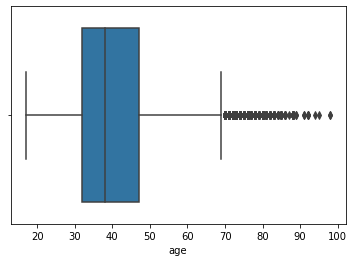

In [13]:
sns.boxplot(Bank['age'])

In [14]:
from imblearn.over_sampling import RandomOverSampler
rus = RandomOverSampler(random_state=0)
X_res, y_res =  rus.fit_resample(Bank.drop('y',axis=1), Bank['y'])


1    36548
0    36548
Name: y, dtype: int64


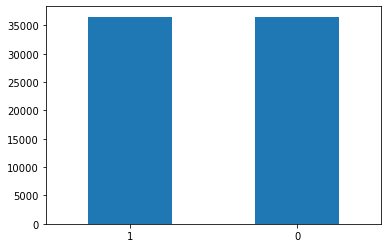

In [15]:
y_res.value_counts().plot(kind = 'bar', rot=0)
print(y_res.value_counts() )

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X_res,y_res, test_size=0.30, 
                                                    random_state=2)

In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
X_train

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
29184,37,0,1,3,0,0,2,0,0,0,463,1,999,1,0,-1.8,93.075,-47.1,1.405,5099.1
66678,56,5,1,3,0,0,0,0,4,3,383,1,3,1,2,-1.7,94.055,-39.8,0.761,4991.6
70164,29,1,0,0,0,0,0,0,6,0,667,3,999,0,1,-1.8,92.893,-46.2,1.250,5099.1
28992,49,1,1,2,0,2,0,0,0,0,832,2,999,0,1,-1.8,93.075,-47.1,1.405,5099.1
39055,76,5,1,6,0,0,0,0,2,2,103,1,999,1,0,-3.0,92.713,-33.0,0.712,5023.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44295,65,5,1,6,0,0,0,0,7,0,226,1,3,3,2,-3.4,92.649,-30.1,0.714,5017.5
33867,53,4,1,6,0,2,0,0,6,4,92,2,999,1,0,-1.8,92.893,-46.2,1.281,5099.1
31019,41,1,1,1,1,0,0,0,6,3,278,1,999,0,1,-1.8,92.893,-46.2,1.344,5099.1
44566,72,5,1,0,0,0,2,0,3,0,483,4,8,1,2,-1.7,94.215,-40.3,0.822,4991.6


In [27]:
x = LogisticRegression()
x.fit(X_train,y_train)

C:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [28]:
predictions = x.predict(X_test)

In [29]:
predictions 

array([1, 1, 0, ..., 1, 0, 0])

In [30]:
from sklearn.metrics import accuracy_score

In [31]:
accuracy=accuracy_score(y_test,predictions)
accuracy

0.8501983674586164

In [34]:
from sklearn.ensemble import AdaBoostRegressor
adaBoost = AdaBoostRegressor(base_estimator=None,
                              learning_rate=1.0,
                              n_estimators=100)

adaBoost.fit(X_train, y_train)

y_pred = adaBoost.predict(X_test)

from sklearn.metrics import accuracy_score

accuracy=accuracy_score(y_test,predictions)
accuracy

0.8501983674586164

In [35]:
from sklearn.model_selection import GridSearchCV
ada=AdaBoostRegressor()
search_grid={'n_estimators':[500,1000,2000],'learning_rate':[.001,0.01,.1],'random_state':[1]}
search=GridSearchCV(estimator=ada,param_grid=search_grid,scoring='neg_mean_squared_error',n_jobs=1)